<div style = "text-align: left"><font size = 8 color = "#B22222" face = "verdana"><b>Data Hackerman Purple Zone</b></font></div>
<div style = "text-align: left"><font size = 6 color = "#00008B" face = "verdana"><b>file manipulation</b></font></div>
<div style = "text-align: leftt"><font><i>By Jerry Aremu</i></font></div>
<div style = "text-align: leftt"><font>26 April 2023</font></div>



#### import libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import requests
import os
import json
import folium
from folium.plugins import HeatMap
import seaborn as sns
import matplotlib.pyplot as plt

#### import autogluon

In [2]:
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

In [3]:
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### FILE MANIPULATION

#### Load the three data files

In [4]:
# main working folder
main_folder = os.getcwd()

In [5]:
# main data folder
data_folder = 'data'

In [6]:
# combine the paths
main_path = os.path.join(main_folder, data_folder)

In [7]:
# get list of files in the folder
files_list = os.listdir(main_path)
files_list

['csv_file.csv', 'json_file.json', 'txt_file.txt']

#### Read each file as a dataframe

### CSV

In [8]:
csv_format_data = pd.read_csv(os.path.join(main_path, files_list[0]))
print(f"The shape of the dataframe is: {csv_format_data.shape}")
csv_format_data.head(2)

The shape of the dataframe is: (1000, 9)


,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566,False,Can't believe I'm missing Love Island 😩,GB,twitter,1,51.57,0.46
1,114,1377,False,Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable,GB,twitter,1,52.97,-1.17


### json

In [9]:
with open(os.path.join(main_path, files_list[1])) as f:
    Json_data = f.read()
json_pyobj = json.loads(Json_data)    

In [10]:
json_format_df = pd.json_normalize(json_pyobj)

In [11]:
print(f"The shape of the json format data is: {json_format_df.shape}")
json_format_df.head(3)

The shape of the json format data is: (1000, 9)


,author.properties.friends,author.properties.verified,author.properties.status_count,location.longitude,location.country,location.latitude,content.body,properties.sentiment,properties.platform
0,150,False,583,-1.45,GB,53.38,To everyone tryin to snapchat me fuck off I'm ugly,-1,twitter
1,1321,False,86271,-4.20,GB,57.79,@cammiescott have you ever been to Scotland? You should give Nessie a wee visit! (I live near her) #askcamscott,-1,twitter
2,1952,False,11785,-0.07,GB,51.46,#LoveIsland #zaraholland 😭😭😭😭 https://t.co/LUpQvshkm3,-1,twitter


### Txt

In [12]:
txt_format_data = pd.read_csv(os.path.join(main_path, files_list[2]), sep = ',', header = 0)
print(f"The shape of the dataframe is: {txt_format_data.shape}")
txt_format_data.head(2)

The shape of the dataframe is: (1000, 9)


,author.properties.friends,author.properties.verified,location.longitude,author.properties.status_count,properties.sentiment,location.latitude,location.country,content.body,properties.platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter
1,278,False,-0.34,31467.00,-1.00,51.60,GB,Who wants to rap battle with me on stream tomorrow 👀,twitter


### combine the three data as one by concatenation

In [13]:
# first collate the CSV and TXT file together 
merged_csv_txt_df = pd.concat([csv_format_data,txt_format_data]).reset_index(drop = True)
print(f"The shape of the csv+txt file is : {merged_csv_txt_df.shape}")
merged_csv_txt_df.head(3)

The shape of the csv+txt file is : (2000, 9)


,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46
1,114,1377.00,False,Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable,GB,twitter,1.00,52.97,-1.17
2,568,8375.00,False,"How many times does he wonna say the phrase ""i deal with shit"" #LoveIsland",GB,twitter,-1.00,51.39,0.03


In [14]:
# now further merge the csv+txt merged data to the json data
combined_data_df = pd.concat([merged_csv_txt_df,json_format_df]).reset_index(drop = True)
print(f"The shape of the csv+txt file is : {combined_data_df.shape}")
combined_data_df.head(3)

The shape of the csv+txt file is : (3000, 9)


,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46
1,114,1377.00,False,Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable,GB,twitter,1.00,52.97,-1.17
2,568,8375.00,False,"How many times does he wonna say the phrase ""i deal with shit"" #LoveIsland",GB,twitter,-1.00,51.39,0.03


### DATA EXPLORATION

#### Inspect the combined data

In [15]:
combined_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   author.properties.friends       3000 non-null   object 
 1   author.properties.status_count  2999 non-null   float64
 2   author.properties.verified      3000 non-null   object 
 3   content.body                    2999 non-null   object 
 4   location.country                2999 non-null   object 
 5   properties.platform             2998 non-null   object 
 6   properties.sentiment            2999 non-null   float64
 7   location.latitude               2999 non-null   float64
 8   location.longitude              2999 non-null   float64
dtypes: float64(4), object(5)
memory usage: 211.1+ KB


In [16]:
# get the summary statistics of the data
combined_data_df.describe()

,author.properties.status_count,properties.sentiment,location.latitude,location.longitude
count,2999.00,2999.00,2999.00,2999.00
mean,35139.96,-0.26,52.75,-1.61
std,129182.54,0.78,1.66,1.64
min,2.00,-1.00,49.19,-7.82
25%,3427.50,-1.00,51.50,-2.68
50%,11435.00,0.00,52.20,-1.40
75%,30461.00,0.00,53.69,-0.18
max,1702464.00,1.00,58.17,1.40


#### Examine the loaction that the data is coming from 

In [17]:
combined_data_wtout_na = combined_data_df.dropna(subset = ['location.latitude'])

In [18]:
# get the location where sentiments on properties were sampled 
location_data = combined_data_wtout_na[['location.latitude','location.longitude']]
area_map =  folium.Map(location=[58.17,1.40], zoom_start=10)
heat_map_data = [[row['location.latitude'],row['location.longitude']] for index, row in location_data.iterrows()]

In [19]:
# display map 
HeatMap(heat_map_data, radius=10).add_to(area_map)

#display the map
area_map;

#### show the spread of the sentiment based on area 

In [20]:
# get the dataframe of properties with positive sentiment 
positv_sentimnt_df = combined_data_wtout_na[combined_data_wtout_na['properties.sentiment']==-1]
print(f"The shape of the positive sentiment dataframe is; {positv_sentimnt_df.shape}")
positv_sentimnt_df.head(2)

The shape of the positive sentiment dataframe is; (1403, 9)


,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
2,568,8375.00,False,"How many times does he wonna say the phrase ""i deal with shit"" #LoveIsland",GB,twitter,-1.00,51.39,0.03
3,1845,19394.00,False,...even better if time travel were invented and I could go there back in 1876 and have a whiskey with Al #Deadwood,GB,twitter,-1.00,51.65,-3.80


In [21]:
# get the dataframe of properties with negative sentiment 
negatv_sentimnt_df = combined_data_wtout_na[combined_data_wtout_na['properties.sentiment']==-1]
print(f"The shape of the negative sentiment dataframe is; {negatv_sentimnt_df.shape}")
negatv_sentimnt_df.head(2)

The shape of the negative sentiment dataframe is; (1403, 9)


,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
2,568,8375.00,False,"How many times does he wonna say the phrase ""i deal with shit"" #LoveIsland",GB,twitter,-1.00,51.39,0.03
3,1845,19394.00,False,...even better if time travel were invented and I could go there back in 1876 and have a whiskey with Al #Deadwood,GB,twitter,-1.00,51.65,-3.80


In [22]:
# get the dataframe of properties with no remark sentiment 
no_sentimnt_df = combined_data_wtout_na[combined_data_wtout_na['properties.sentiment']==0]
print(f"The shape of the negative sentiment dataframe is; {no_sentimnt_df.shape}")
no_sentimnt_df.head(2)

The shape of the negative sentiment dataframe is; (968, 9)


,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
4,1617,17922.00,False,@GreenAlty @ShakeyStephens My Mum in mid 80s pushed into road by Black migrants 2 sons with disabilities attacked robbed U THINK WE NEED MOR,GB,twitter,0.00,53.54,-2.65
8,783,32215.00,False,"@Ray1Moses @Cornerstone_HQ Rice flour then. Doesn't have the same effect yelling ""Self-raising"" . People just think you're mad .",GB,twitter,0.00,57.59,-4.53


In [23]:
# Create a Folium map centered on the first location of df1
map2 = folium.Map(location=[positv_sentimnt_df['location.latitude'].iloc[0], positv_sentimnt_df['location.longitude'].iloc[0]], zoom_start=5)

In [24]:
# Add markers for each location of positv_sentimnt_df with blue color
positv_sentimnt_df.apply(lambda row: folium.Marker(location=[row['location.latitude'], row['location.longitude']], popup=row['location.country'], icon=folium.Icon(color='blue')).add_to(map2), axis=1)

# Add markers for each location of negatv_sentimnt_df with red color
negatv_sentimnt_df.apply(lambda row: folium.Marker(location=[row['location.latitude'], row['location.longitude']], popup=row['location.country'], icon=folium.Icon(color='red')).add_to(map2), axis=1)

# Add markers for each location of no_sentimnt_df with green color
no_sentimnt_df.apply(lambda row: folium.Marker(location=[row['location.latitude'], row['location.longitude']], popup=row['location.country'], icon=folium.Icon(color='green')).add_to(map2), axis=1)

# Display the map
map2;

map2.save('map.html')

#### Ratio of positive to negative sentiment and no_remarks

In [25]:
sentiment_series = combined_data_wtout_na['properties.sentiment']

In [26]:
sentiment_count = combined_data_wtout_na["properties.sentiment"].unique()
sentiment_count

array([ 1., -1.,  0.])

Text(0.5, 0, 'properties_sentiment')

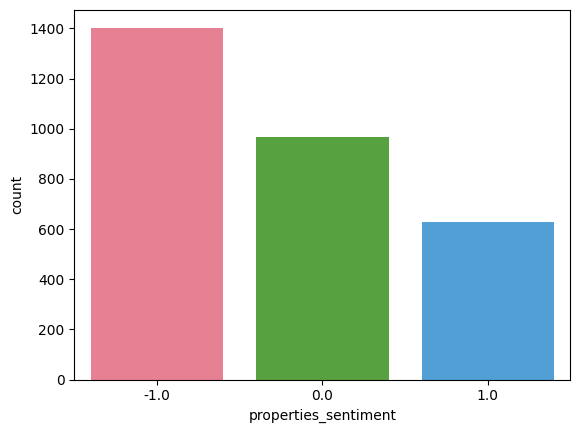

In [27]:
ax = sns.countplot(x = sentiment_series, palette = 'husl')
ax.set_xlabel('properties_sentiment')


### Model development

In [28]:
# remove row containing null sentiment 
properties_df = combined_data_df[combined_data_df["properties.sentiment"].notnull()]
print(f"The shape of properties df dataframe is: {properties_df.shape}")
properties_df.head(2)

The shape of properties df dataframe is: (2999, 9)


,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46
1,114,1377.00,False,Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable,GB,twitter,1.00,52.97,-1.17


In [29]:
properties_df.columns

Index(['author.properties.friends', 'author.properties.status_count',
       'author.properties.verified', 'content.body', 'location.country',
       'properties.platform', 'properties.sentiment', 'location.latitude',
       'location.longitude'],
      dtype='object')

In [30]:
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

In [31]:
properties_df.shape


(2999, 9)

In [32]:
train_data, test_data = train_test_split(properties_df, test_size=0.33, random_state=42)

In [33]:
train_data.shape, test_data.shape

((2009, 9), (990, 9))

In [34]:
train_data.head(2)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
406,2280,15806.00,False,@ScottMaslenCrew just asked if Dot was Ginger omg hahaha,GB,twitter,-1.00,55.98,-3.71
2840,616,4623.00,False,in love with my promise ring😇😇,GB,twitter,1.00,53.30,-0.80


In [35]:
test_data.head(2)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
1376,282,2085.00,False,@Donforester Many established 1st generation immigrants want to restrict immigration. Many 2nd generation eg Irish more welcoming,GB,twitter,0.00,53.42,-2.92
932,51,12533.00,False,@smollyalexander thank u hunty,GB,twitter,1.00,53.37,-2.17


In [42]:
save_path = 'models'
time_limit = 60
label = "properties.sentiment"

predictor = TabularPredictor(label = TARGET, path = save_path, problem_type = "multiclass").fit(train_data, time_limit = time_limit)

Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "models\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    2009
Train Data Columns: 8
Label Column: properties.sentiment
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6808.18 MB
	Train Data (Original)  Memory Usage: 0.9 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGener

In [38]:
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.67,0.19,38.02,0.00,0.74,2,True,14
1,LightGBMXT,0.67,0.00,1.60,0.00,1.60,1,True,4
2,XGBoost,0.66,0.02,1.55,0.02,1.55,1,True,11
3,CatBoost,0.65,0.01,22.69,0.01,22.69,1,True,8
4,LightGBM,0.65,0.02,1.36,0.02,1.36,1,True,5
5,LightGBMLarge,0.64,0.00,5.41,0.00,5.41,1,True,13
6,RandomForestEntr,0.64,0.13,0.93,0.13,0.93,1,True,7
7,ExtraTreesGini,0.63,0.08,0.72,0.08,0.72,1,True,9
8,RandomForestGini,0.63,0.11,0.93,0.11,0.93,1,True,6
9,ExtraTreesEntr,0.62,0.09,0.75,0.09,0.75,1,True,10


### Model Evaluation

#### Features Importance

In [44]:
y_test = test_data[label] #values to predict
test_wtout_label = test_data.drop(columns = [label])

In [46]:
test_wtout_label.sample(5)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,location.latitude,location.longitude
1055,465,87051.00,False,"J'suis archi fine en vrai c'est mtn je crame, on va voir si jv pas devenir une thick girl mtn",GB,twitter,51.55,-0.06
597,838,1048.00,False,Could sleep for a week 💤,GB,twitter,54.68,-6.81
2734,683,93074.00,False,Yh I'm deleting Twitter. Bye. https://t.co/16hMpnsLFo,GB,twitter,51.45,-0.19
340,1412,1295.00,False,@thebubsociety You're too kind!!! Thanks 😃😃,GB,twitter,53.52,-1.14
1239,288,66839.00,False,"@kf_ @Zenexeon @Cazah_ yh man zenexeon thats the one, i was fucking screaming, and yh typical fat cal man leaning for camo challenges",GB,twitter,51.40,-0.25


In [47]:
save_model_predictor = TabularPredictor.load(save_path)

In [48]:
y_pred = save_model_predictor.predict(test_wtout_label)

In [49]:
y_pred_prob = save_model_predictor.predict(test_wtout_label)

In [50]:
y_pred_prob[15:25]

2896    0.00
2065   -1.00
460    -1.00
2356   -1.00
2319    1.00
1507   -1.00
761    -1.00
102    -1.00
1813   -1.00
44      0.00
Name: properties.sentiment, dtype: float64

In [51]:
y_pred[15:25]

2896    0.00
2065   -1.00
460    -1.00
2356   -1.00
2319    1.00
1507   -1.00
761    -1.00
102    -1.00
1813   -1.00
44      0.00
Name: properties.sentiment, dtype: float64

In [52]:
#print((Predictions: \n", y_pred))
perf = predictor.evaluate_predictions(y_true = y_test, y_pred = y_pred_prob) #auxilliary_metric = True

Evaluation: accuracy on test data: 0.6303030303030303
Evaluations on test data:
{
    "accuracy": 0.6303030303030303,
    "balanced_accuracy": 0.5716161108317971,
    "mcc": 0.3974587246364037
}


In [53]:
save_model_predictor.leaderboard(test_data, silent = True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesEntr,0.64,0.62,0.14,0.09,0.72,0.14,0.09,0.72,1,True,10
1,WeightedEnsemble_L2,0.63,0.67,0.29,0.16,36.53,0.02,0.00,0.64,2,True,14
2,ExtraTreesGini,0.62,0.63,0.14,0.09,0.72,0.14,0.09,0.72,1,True,9
3,RandomForestGini,0.62,0.63,0.16,0.10,0.82,0.16,0.10,0.82,1,True,6
4,XGBoost,0.62,0.66,0.04,0.01,1.49,0.04,0.01,1.49,1,True,11
5,RandomForestEntr,0.62,0.64,0.16,0.08,0.79,0.16,0.08,0.79,1,True,7
6,LightGBM,0.62,0.65,0.02,0.02,1.21,0.02,0.02,1.21,1,True,5
7,LightGBMLarge,0.62,0.64,0.03,0.02,5.47,0.03,0.02,5.47,1,True,13
8,LightGBMXT,0.61,0.67,0.02,0.00,1.40,0.02,0.00,1.40,1,True,4
9,CatBoost,0.61,0.65,0.02,0.00,22.95,0.02,0.00,22.95,1,True,8


In [54]:
test_data["predicted_properties.sentiment"] = y_pred

In [56]:
test_data.sample(10)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude,predicted_properties.sentiment
2015,661,25221.00,False,Yeah defo https://t.co/d2y9dcIXWw,GB,twitter,-1.00,51.57,-0.26,-1.00
1512,502,4749.00,False,I'm so excited to get my nails done after exams💁🏼💅🏼,GB,twitter,1.00,53.22,-1.68,-1.00
2551,509,7419.00,False,@Kyle_Wellss is joke I say it all the time but cmon😂 fucking hell,GB,twitter,-1.00,53.41,-2.16,-1.00
340,1412,1295.00,False,@thebubsociety You're too kind!!! Thanks 😃😃,GB,twitter,1.00,53.52,-1.14,1.00
221,410,341.00,False,tbh not motivated to do college work now im on my way to getting an apprenticeship... need to get it done tho,GB,twitter,-1.00,52.23,0.51,-1.00
1357,2933,26415.00,False,@ao I normally do an ironing marathon twice a week whilst watching the soaps in the evening :),GB,twitter,1.00,51.08,-4.05,-1.00
1370,984,15120.00,False,Tell em!! https://t.co/aKGKeWNrJE,GB,twitter,0.00,51.46,0.36,0.00
1231,100,13566.00,False,@TheSnowyAngel I only have pizzas at 5am if I've been drinking. Unfortunately I haven't today. :P,GB,twitter,-1.00,52.92,-1.47,-1.00
2930,2259,12612.00,False,When you have to get a ladder to put your photos up 😂😂 https://t.co/VQiX9GrRIR,GB,twitter,-1.00,50.83,-0.39,-1.00
1270,519,21301.00,False,Lovee the Kaiser Chiefs💖💖💖,GB,twitter,0.00,57.79,-4.20,-1.00


#### INPUT BASED PREDICTION

In [63]:
combined_data_wtout_na.columns

Index(['author.properties.friends', 'author.properties.status_count',
       'author.properties.verified', 'content.body', 'location.country',
       'properties.platform', 'properties.sentiment', 'location.latitude',
       'location.longitude'],
      dtype='object')

In [60]:
combined_data_wtout_na.head(1)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46


In [61]:
combined_data_wtout_na["content.body"].unique()

array(["Can't believe I'm missing Love Island 😩",
       "Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable",
       'How many times does he wonna say the phrase "i deal with shit" #LoveIsland',
       ..., '#NP Shola Ama - Loving My Baby',
       'Could not have had a worse couple days. Failed MOT, lost my passport, and now just found out I sent £300 for my Napa Accom to the wrong acc.',
       "@FHPReading Hi guys, we're from Reading and would love to take your branding to a new level. Get in touch and we'll chat more! #snapchat"],
      dtype=object)

In [62]:
combined_data_wtout_na["properties.sentiment"].unique()

array([ 1., -1.,  0.])

#### Create a sample input

In [64]:
input_data_dict = {
    'author.properties.friends' : 114, 
    'author.properties.status_count' : 1377,
    'author.properties.verified': 'True', 
    'content.body': "Can't believe I'm missing Love Island 😩", 
    'location.country': 'GG',
    'properties.platform': 'twitter',
    'location.latitude':52.96974444,
    'location.longitude': -1.172266
    
}

In [65]:
input_data_dict

{'author.properties.friends': 114,
 'author.properties.status_count': 1377,
 'author.properties.verified': 'True',
 'content.body': "Can't believe I'm missing Love Island 😩",
 'location.country': 'GG',
 'properties.platform': 'twitter',
 'location.latitude': 52.96974444,
 'location.longitude': -1.172266}

In [66]:
input_data_df = pd.DataFrame([input_data_dict])

In [67]:
input_data_df

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,location.latitude,location.longitude
0,114,1377,True,Can't believe I'm missing Love Island 😩,GG,twitter,52.97,-1.17


In [69]:
save_model_predictor.predict(input_data_df)

0   1.00
Name: properties.sentiment, dtype: float64

In [70]:
save_model_predictor.predict(input_data_df)[0]

1.0